#  AAPL stock prediction for 2014-2018

In this notebook we will try Linear Regression, Random Forest Regressor and LSTM model for AAPL stock and will figure out which model suits the best for the stock of our interest. 

## Importing necessary packages

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

## Reading the csv file

In [41]:
aapl=pd.read_csv("AAPL.csv")

## The following three steps will provide a basic understanding of the dataset

In [42]:
aapl.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AAPL,79.382858,79.018570,67.486176,78.860001,79.575714,58671200,1/2/2014
1,AAPL,78.980003,77.282860,66.003777,77.204285,79.099998,98116900,1/3/2014
2,AAPL,76.778572,77.704285,66.363701,76.228569,78.114288,103152700,1/6/2014
3,AAPL,77.760002,77.148575,65.889114,76.845711,77.994286,79302300,1/7/2014
4,AAPL,76.972855,77.637146,66.306381,76.955711,77.937141,64632400,1/8/2014


In [43]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 8 columns):
ticker       1171 non-null object
open         1171 non-null float64
close        1171 non-null float64
adj_close    1171 non-null float64
low          1171 non-null float64
high         1171 non-null float64
volume       1171 non-null int64
date         1171 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 73.3+ KB


In [44]:
aapl.shape

(1171, 8)

We have 8 features and 1171 observations

## Building a Linear Regression model for AAPL stock

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Index will be taken as the X and the target varialble will be 'close'

In [46]:
X= np.array(aapl.index).reshape(-1,1)
y= aapl.close

In [47]:
n_train= 1000

For the above step, the variable n_train is given the value of 1000 to make a training test split of 1000:117

In [48]:
lr = LinearRegression()

In [49]:
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)   
y_pred = lr.predict(X_test)

([<matplotlib.axis.XTick at 0x20a12692c88>,
 <a list of 12 Text xticklabel objects>)

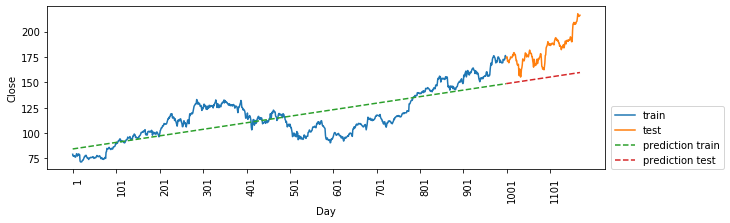

In [50]:
plt.figure(figsize=(10, 3))
plt.xticks(range(0, len(X), 8),rotation=90,ha="left")
plt.plot(range(n_train), y_train, label="train")   
plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")    
plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="prediction test")   
plt.legend(loc=(1.01, 0))    
plt.xlabel("Day")  
plt.ylabel("Close")
plt.xticks([1,101,201,301,401,501,601,701,801,901,1001,1101])

In [51]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [52]:
rms

29.908916619018868

From the above graph it is clear that not a single point of the actual data lies on the regression line. Hence linear regression cannot directly be used to predict stock prices. Also the the RMS value for the model is high stating that the model is not really compatible with stock prediction.

# Trying RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0) 
regressor.fit(X_train,y_train)
y_pred_train = regressor.predict(X_train)   
y_pred = regressor.predict(X_test)


([<matplotlib.axis.XTick at 0x209d6765748>,
 <a list of 12 Text xticklabel objects>)

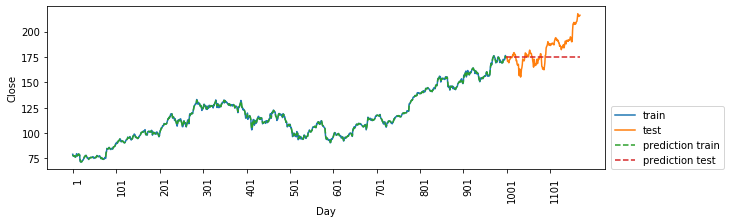

In [54]:
plt.figure(figsize=(10, 3))
plt.xticks(range(0, len(X), 8),rotation=90,ha="left")
plt.plot(range(n_train), y_train, label="train")   
plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")    
plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="prediction test")   
plt.legend(loc=(1.01, 0))    
plt.xlabel("Day")  
plt.ylabel("Close")
plt.xticks([1,101,201,301,401,501,601,701,801,901,1001,1101])

The above model can be considered as a better model than the linear regression model but cannot say this is the best.

In [55]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

15.337741817981481

Clearly the RMS value have drastically come down with this model. Hence we can say that Random forest regressor is relatiely a better model.

# Trying LSTM(Long Short Term Memory) Model on the AAPL stock.

In [56]:
#importing required libraries to run the model
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [57]:
#creating dataframe for AAPL data
data = aapl.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(aapl)),columns=['date', 'close'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]

In [24]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

In [25]:
#creating train and test sets for the moddel
dataset = new_data.values

In [26]:
train = dataset[0:1000,:]
valid = dataset[1000:,:]

In [27]:
#creating x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [28]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [30]:
# create and fit the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





 - 91s - loss: 0.0015


In [32]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [33]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [34]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

## Plotting the predicted values on a graph

C:\Users\VINU\.conda\envs\DAB300\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x20a1162b5c8>,
 <a list of 4 Text xticklabel objects>)

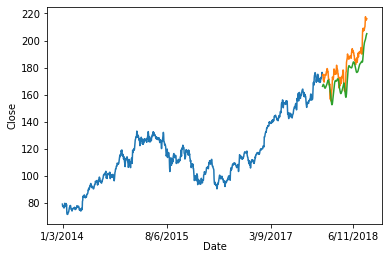

In [39]:
train = new_data[:1000]
valid = new_data[1000:]
valid['Predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.xlabel("Date",labelpad = 0.5)  
plt.ylabel("Close")
plt.xticks([1,401,801,1117]) 



## Checking the RMS value for the model

In [50]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

close          6.114494
Predictions    0.000000
dtype: float64

Clearly we can see that LSTM model is the best model wew it comes to the stock prediction as it capture most of the noise in the data to give us a reliable prediction. The rms value for the model is the least and can be said as a giant leap when we compare it with an ordinary regression model. 